In [1]:
#Install all required python lib.
%pip install pandas
%pip install numpy
%pip install geopandas
%pip install shapely
%pip install matplotlib
%pip install plotly_express
%pip install sentinelhub
%pip install rasterio
%pip install earthpyname: geo-data
%pip install utils
!pip install sentinelhub==3.4.1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Invalid requirement: 'earthpyname:'
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import all python lib.
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import os
import warnings
import datetime
warnings.filterwarnings('ignore')

In [3]:
from sentinelhub import (
    MimeType,
    CRS,
    BBox,
    SentinelHubRequest,
    SentinelHubDownloadClient,
    DataCollection,
    bbox_to_dimensions,
    DownloadRequest
)


<h1><b>Configure AWS Keys and Sentinel Hub Id</b></h1>

In [ ]:
#Input instance id and client id from the sentinel hub
#input aws iAM keys for access to my aws account
from sentinelhub import SHConfig

config = SHConfig()

config.instance_id = '' #instance id
config.sh_client_id = ''  #sentinel hub client id
config.sh_client_secret = ''  #sentinel hub secret
config.aws_access_key_id = ''  #aws access key
config.aws_secret_access_key = '' #aws secret key

In [5]:
#Save configuration 
config.save()

In [6]:
#Input WFS to allow us to perform some data manipulation on different geographical locations
from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig
if config.instance_id == '':
    print("Warning! To use WFS functionality, please configure the `instance_id`.")

<h1><b>Mole National Park</b></h1>


In [7]:
#Use Bbox to specify the geographical location of Mole National Park https://molenationalpark.org/
search_bbox = BBox(bbox=[-1.851196,9.264779,-1.788025,9.700935], crs=CRS.WGS84)
search_time_interval = ("2021-01-10T00:00:00", "2022-12-10T23:59:59")


wfs_iterator = WebFeatureService(
    search_bbox, search_time_interval, data_collection=DataCollection.SENTINEL2_L1C, maxcc=1.0, config=config
)

for tile_info in wfs_iterator:
    print(tile_info)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[-1.9165781729624556, 9.949644078437451], [-2.0898153146856426, 9.162506797649002], [-2.090331938754135, 8.957173405588467], [-1.0918256072464385, 8.953372194561377], [-1.0863496013234732, 9.94592425838906], [-1.9165781729624556, 9.949644078437451]]]]}, 'properties': {'id': 'S2B_OPER_MSI_L1C_TL_2BPS_20220814T140445_A028405_T30PXR_N04.00', 'date': '2022-08-14', 'time': '10:38:34', 'path': 's3://sentinel-s2-l1c/tiles/30/P/XR/2022/8/14/0', 'crs': 'EPSG:32630', 'mbr': '600000,990240 709800,1100040', 'cloudCoverPercentage': 100}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[-2.0877199094388628, 9.950154705244987], [-2.0903296898014503, 8.958077887564095], [-1.935295359380101, 8.958742227131086], [-1.7094094034301344, 9.948908799835

In [8]:
from sentinelhub import AwsTile

tile_id = 'S2A_OPER_MSI_L1C_TL_SGS__20200112T120158_A023800_T30NXN_N02.08'
tile_name, time, aws_index = AwsTile.tile_id_to_tile(tile_id)
tile_name, time, aws_index




tile_id2 = 'S2B_OPER_MSI_L1C_TL_SGS__20200117T121509_A014963_T30NXN_N02.08'
tile_name2, time2, aws_index2 = AwsTile.tile_id_to_tile(tile_id2)
tile_name2, time2, aws_index2




('30NXN', '2020-1-17', 0)

In [9]:
from sentinelhub import CRS, BBox, DataCollection, SHConfig, WebFeatureService

config = SHConfig()

if config.instance_id == "":
    print("Warning! To use WFS functionality, please configure the `instance_id`.")

In [10]:
#Import the type of bands needed and specify our folder Data to store the data
warnings.simplefilter("ignore", UserWarning)
from sentinelhub import AwsTileRequest

bands = ['B01','B02','B03','B04','B07','B08','B8A', 'B10','B11','B12']
metafiles = ['tileInfo', 'preview', 'qi/MSK_CLOUDS_B00']
data_folder = './Mole_Data'


In [11]:
#Trigger the download to create the folder Data
request = AwsTileRequest(
    tile=tile_name,
    time=time,
    aws_index=aws_index,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder,
    data_collection=DataCollection.SENTINEL2_L1C
)

request.save_data()


request2 = AwsTileRequest(
    tile=tile_name2,
    time=time2,
    aws_index=aws_index2,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder,
    data_collection=DataCollection.SENTINEL2_L1C
)

request2.save_data()




In [12]:
#Download data one
data_list = request.get_data(redownload=True)

p_b01,p_b02,p_b03,p_b04,p_b07,p_b08,p_b8a,p_b10,p_b11,p_b12,p_tile_info, p_preview, p_cloud_mask = data_list

In [13]:
#Download data two
data_list2 = request2.get_data(redownload=True)

p_b01_2,p_b02_2,p_b03_2,p_b04_2,p_b07_2,p_b08_2,p_b8a_2,p_b10_2,p_b11_2,p_b12_2,p_tile_info_2, p_preview_2, p_cloud_mask_2 = data_list2

<h3><b>Plot Image Using Matplotlib</b></h3>

<Figure size 4176x864 with 0 Axes>

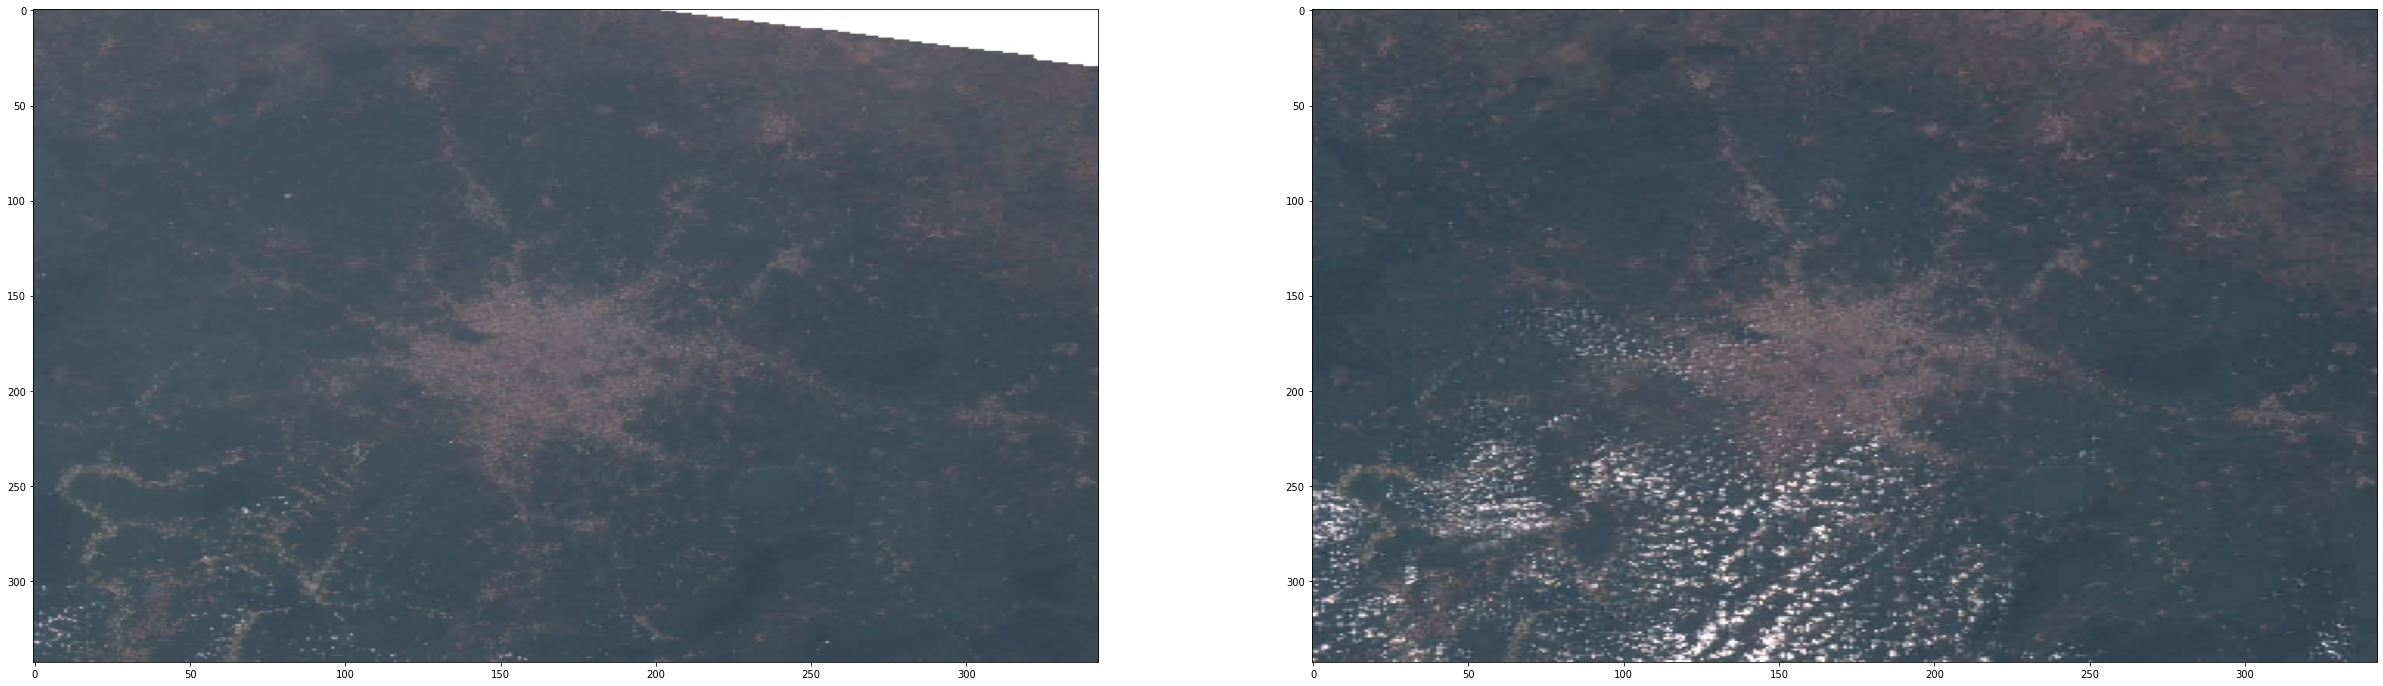

In [14]:
#Plot image
plt.figure(figsize = (58,12))
f, axarr = plt.subplots(1,2,figsize = (42,12));
axarr[0].imshow(p_preview,aspect='auto');
axarr[1].imshow(p_preview_2,aspect='auto');





<h1><b>Ankasa Game Reserve</b></h1>

```

```



In [15]:
#Use Bbox to specify the geographical, first location is Ankasa Game Reserve
search_bbox_1 = BBox(bbox=[-2.621613,5.219511,-2.570801,5.339848], crs=CRS.WGS84)
search_time_interval_1 = ("2020-01-10T00:00:00", "2022-12-10T23:59:59")


wfs_iterator_1 = WebFeatureService(
    search_bbox_1, search_time_interval_1, data_collection=DataCollection.SENTINEL2_L1C, maxcc=1.0, config=config
)

for tile_info in wfs_iterator_1:
    print(tile_info)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[-2.9104235882520255, 5.42820973470819], [-3.000171401548251, 5.021005690634543], [-3.000171257562134, 4.434913386066783], [-2.010550651462357, 4.4342503296557725], [-2.0090795559844103, 5.427404031452592], [-2.9104235882520255, 5.42820973470819]]]]}, 'properties': {'id': 'S2B_OPER_MSI_L1C_TL_2BPS_20220814T140445_A028405_T30NWL_N04.00', 'date': '2022-08-14', 'time': '10:39:50', 'path': 's3://sentinel-s2-l1c/tiles/30/N/WL/2022/8/14/0', 'crs': 'EPSG:32630', 'mbr': '499980,490200 609780,600000', 'cloudCoverPercentage': 95.21}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[-2.711637145132414, 6.332953034356921], [-2.929837933446778, 5.339755553596159], [-2.009222741939381, 5.338960531281774], [-2.0074774428475983, 6.332084382151498

In [16]:
from sentinelhub import AwsTile

tile_id3 = 'S2A_OPER_MSI_L1C_TL_SGS__20200112T120158_A023800_T30NWM_N02.08'
tile_name3, time3, aws_index3 = AwsTile.tile_id_to_tile(tile_id3)
tile_name3, time3, aws_index3




tile_id4 = 'S2A_OPER_MSI_L1C_TL_EPAE_20200122T111753_A023943_T30NWM_N02.08'
tile_name4, time4, aws_index4 = AwsTile.tile_id_to_tile(tile_id4)
tile_name4, time4, aws_index4

('30NWM', '2020-1-22', 0)

In [17]:
#Import the type of bands needed and specify our folder Data to store the data
warnings.simplefilter("ignore", UserWarning)
from sentinelhub import AwsTileRequest

bands = ['B01','B02','B03','B04','B07','B08','B8A', 'B10','B11','B12']
metafiles = ['tileInfo', 'preview', 'qi/MSK_CLOUDS_B00']
data_folder1 = './Ankasa_Data'

In [18]:
#Trigger the download to create the folder Data
request3 = AwsTileRequest(
    tile=tile_name3,
    time=time3,
    aws_index=aws_index3,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder1,
    data_collection=DataCollection.SENTINEL2_L1C
)

request3.save_data()


request4 = AwsTileRequest(
    tile=tile_name4,
    time=time4,
    aws_index=aws_index4,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder1,
    data_collection=DataCollection.SENTINEL2_L1C
)

request4.save_data()

In [19]:
#Download data three
data_list3 = request3.get_data(redownload=True)

p_b01_3,p_b02_3,p_b03_3,p_b04_3,p_b07_3,p_b08_3,p_b8a_3,p_b10_3,p_b11_3,p_b12_3,p_tile_info_3, p_preview_3, p_cloud_mask_3 = data_list3

In [20]:
#Download data four
data_list4 = request4.get_data(redownload=True)

p_b01_4,p_b02_4,p_b03_4,p_b04_4,p_b07_4,p_b08_4,p_b8a_4,p_b10_4,p_b11_4,p_b12_4,p_tile_info_4, p_preview_4, p_cloud_mask_4 = data_list4

<Figure size 4176x864 with 0 Axes>

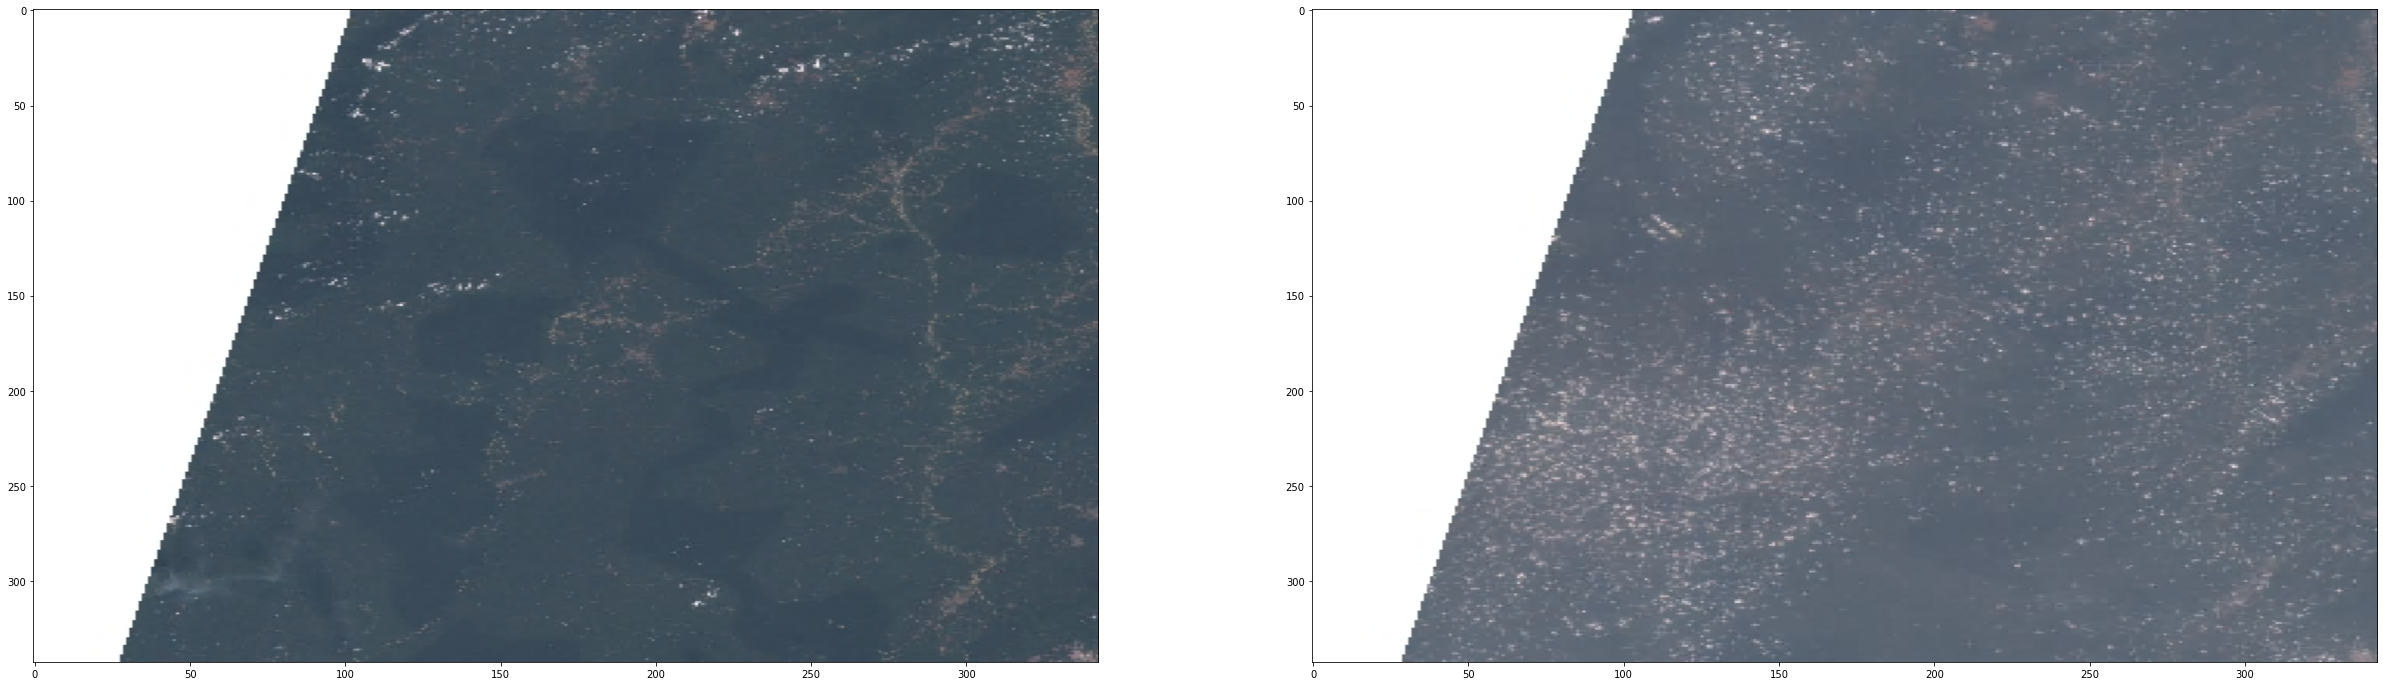

In [21]:
#Plot image
plt.figure(figsize = (58,12))
f, axarr = plt.subplots(1,2,figsize = (42,12));
axarr[0].imshow(p_preview_3,aspect='auto');
axarr[1].imshow(p_preview_4,aspect='auto');


In [22]:
import rasterio
from rasterio import plot

In [23]:
#changing the time variable to two digit of month and day due to folder creation accordigly 
timesplit = time.split("-")
newtime=''
for splitedval in timesplit:
    if len(newtime) > 0:
        newtime += "-"
    if len(splitedval) == 1:
        splitedval = '%02d' % int(splitedval)
        #print(splitedval)
        newtime += splitedval
    else:
        newtime += splitedval


In [24]:
timesplit = time2.split("-")
newtime2=''
for splitedval in timesplit:
    if len(newtime2) > 0:
        newtime2 += "-"
    if len(splitedval) == 1:
        splitedval = '%02d' % int(splitedval)
        #print(splitedval)
        newtime2 += splitedval
    else:
        newtime2 += splitedval

In [29]:
localpath = './Mole_Data/'+tile_name+','+newtime+','+str(aws_index)
localpath2 = './Mole_Data/'+tile_name2+','+newtime2+','+str(aws_index2)

In [30]:
#image 1

b4 = rasterio.open(localpath+'/B04.jp2')
b8 = rasterio.open(localpath+'/B08.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()
ndvi = (nir.astype(float)-red.astype(float))/(nir.astype(float)+red.astype(float))

In [31]:
#image 2

b4_2 = rasterio.open(localpath2+'/B04.jp2')
b8_2 = rasterio.open(localpath2+'/B08.jp2')

# read Red(b4) and NIR(b8) as arrays
red_2 = b4_2.read()
nir_2 = b8_2.read()
ndvi_2 = (nir_2.astype(float)-red_2.astype(float))/(nir_2.astype(float)+red_2.astype(float))

In [32]:
import earthpy.spatial as es
import earthpy.plot as ep

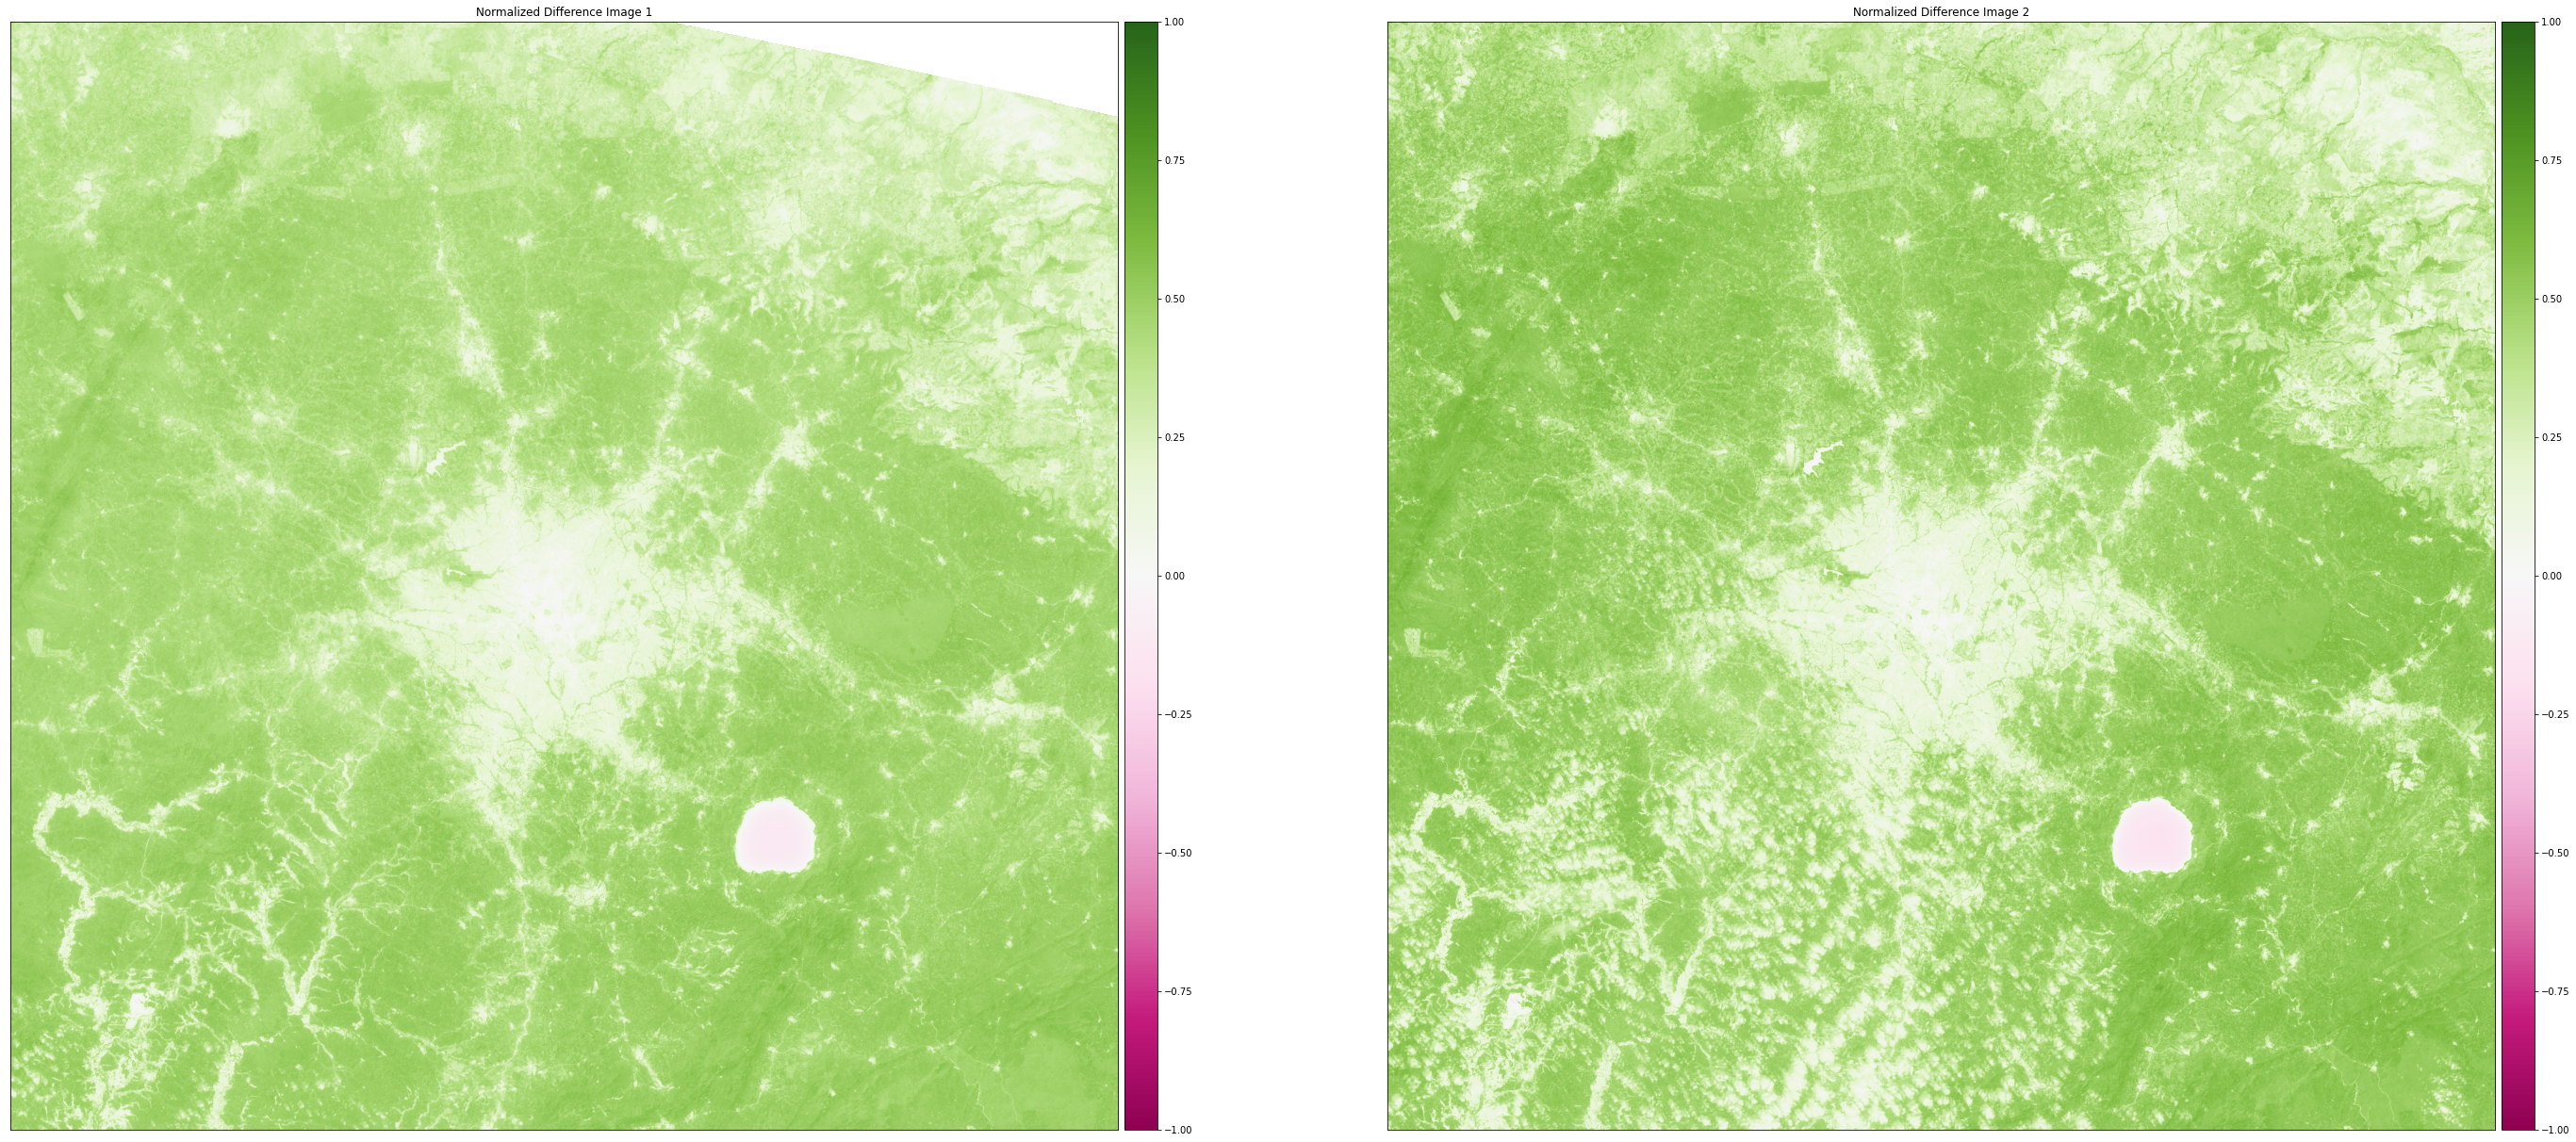

In [33]:
# Create figure with one plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(48, 24))
title = "Normalized Difference Image 1"
title2 = "Normalized Difference Image 2"
ep.plot_bands(ndvi, cmap="PiYG", cols=2, title=title, vmin=-1, vmax=1,ax=ax1);
ep.plot_bands(ndvi_2, cmap="PiYG", cols=2, title=title2, vmin=-1, vmax=1,ax=ax2);
plt.show()

In [34]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_density_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_density_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_density_class
)
np.unique(ndvi_density_class)

masked_array(data=[1, 2, 3, 4, 5, 6],
             mask=False,
       fill_value=999999)

In [35]:
# Create classes and apply to NDVI results
ndvi_density_class_2 = np.digitize(ndvi_2, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_density_class_2 = np.ma.masked_where(
    np.ma.getmask(ndvi_2), ndvi_density_class_2
)
np.unique(ndvi_density_class_2)

masked_array(data=[1, 2, 3, 4, 5],
             mask=False,
       fill_value=999999)

In [36]:
from matplotlib.colors import ListedColormap
# Define color map
nbr_colors = ["khaki", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Dead forest",
    "Scrub",
    "Open Forest",
    "Moderately Dense Forest",
    "Very Dense Forest",
]

# Get list of classes
classes = np.unique(ndvi_density_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

In [ ]:
# Plot your data
#fig, ax = plt.subplots(figsize=(12, 12))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
im1 = ax1.imshow(np.squeeze(ndvi_density_class), cmap=nbr_cmap)
ep.draw_legend(im_ax=im1, classes=classes, titles=ndvi_cat_names)
ax1.set_title(
    "Sentinel2L1C - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)

im2 = ax2.imshow(np.squeeze(ndvi_density_class_2), cmap=nbr_cmap)
ep.draw_legend(im_ax=im2, classes=classes, titles=ndvi_cat_names)
ax2.set_title(
    "Sentinel2L1C - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax1.set_axis_off()
ax2.set_axis_off()
plt.tight_layout()